### Import Relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from mrmr import mrmr_regression
from sklearn.preprocessing import MinMaxScaler






### Data Analysis and Features selection

In [2]:
patient_36 = pd.read_csv('Patient 36_data.csv')

In [3]:
patient_36.describe()

,hm_mode0,hm_mode1,hm_mode2,hm_mode3,hm_mode4,hc_mode0,hc_mode1,hc_mode2,hc_mode3,hc_mode4,...,Disp_mode1,Disp_mode2,Disp_mode3,Disp_mode4,dispm_mode0,dispm_mode1,dispm_mode2,dispm_mode3,dispm_mode4,BIS
count,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,...,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000
mean,0.036354,0.396510,0.840245,1.094918,1.511341,5.383015,1.132913,1.031889,1.010860,1.011257,...,1.958424,1.596543,1.886259,2.066088,0.901326,1.842229,2.072101,2.050007,1.968722,42.361492
std,0.011111,0.017781,0.009607,0.007147,0.016778,1.354183,0.032282,0.004521,0.002652,0.002443,...,0.012805,0.034112,0.014787,0.006709,0.055332,0.015623,0.000712,0.001043,0.003870,14.613828
min,0.014701,0.300240,0.807659,1.081122,1.450247,2.116394,1.039945,1.019051,0.943581,0.946640,...,1.919180,1.490192,1.840849,2.018036,0.527367,1.741329,2.069342,2.045819,1.957119,23.100000
25%,0.028935,0.396354,0.834913,1.090794,1.501276,4.787556,1.118096,1.028475,1.010190,1.010600,...,1.949296,1.580702,1.875991,2.062266,0.873011,1.838010,2.071675,2.049343,1.966314,32.800000
50%,0.030830,0.400470,0.840686,1.093503,1.505593,5.157867,1.126072,1.031990,1.010881,1.011268,...,1.958944,1.602575,1.886763,2.066389,0.890444,1.844041,2.072161,2.050008,1.968505,37.600000
75%,0.042950,0.404376,0.846606,1.096501,1.510494,5.580152,1.134664,1.035027,1.011514,1.012130,...,1.967992,1.618958,1.896708,2.071216,0.924300,1.850817,2.072613,2.050672,1.970680,49.800000
max,0.092290,0.415879,0.870237,1.138465,1.577684,16.160636,1.424438,1.077799,1.017352,1.018202,...,1.995923,1.681130,1.928578,2.077924,1.052239,1.880647,2.074139,2.053783,1.988809,97.700000


In [4]:
X=patient_36.drop('BIS', axis=1)
y= patient_36['BIS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Linear regression

In [5]:
metrics = {}
def plot_regression(data, column):
    
    global metrics
    
    X = data[column].values.reshape(-1, 1)
    #X = X[:, np.newaxis]
    y = data['BIS']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Perform regression
    reg = LinearRegression(n_jobs=-1).fit(X_train_scaled, y_train)
    
    # Predictions
    y_predicted = reg.predict(X_test_scaled)
    
    # Show the score and r2
    #mse = mean_squared_error(y, y_predicted)
    r2 = r2_score(y_test, y_predicted)
    
    # keep track of metrics
    
    #metrics["{}_mse".format(column)] = mse
    metrics["{}_r2".format(column)] = r2
    
    
    
    # Plot the graph#
    plt.figure(figsize=(8,6))
    plt.scatter(data[column], data['BIS'], label="data", c="blue")
    plt.plot(X_test, y_predicted, label="Regression", c="red")
    plt.xlabel(column)
    plt.ylabel('BIS')
    plt.legend(loc="upper left")
    plt.show()

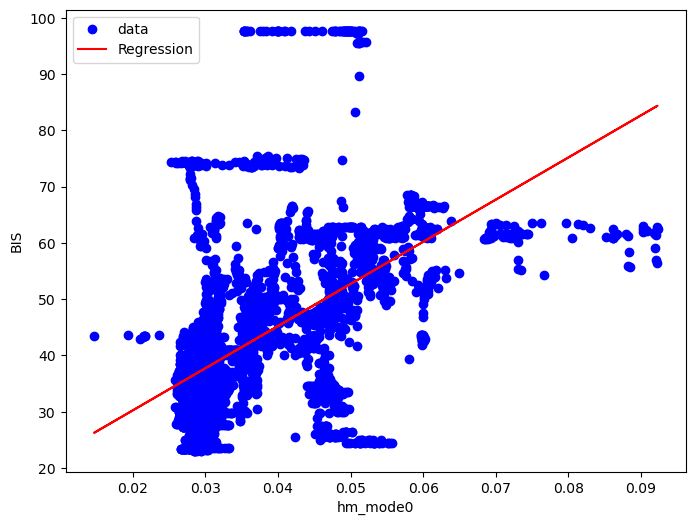

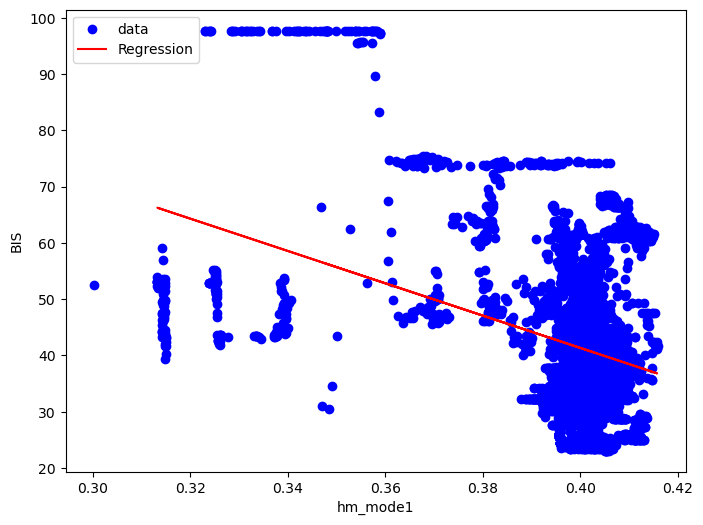

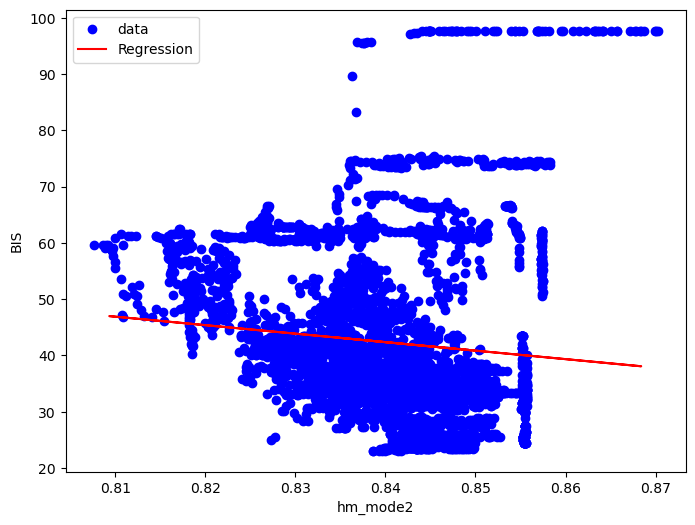

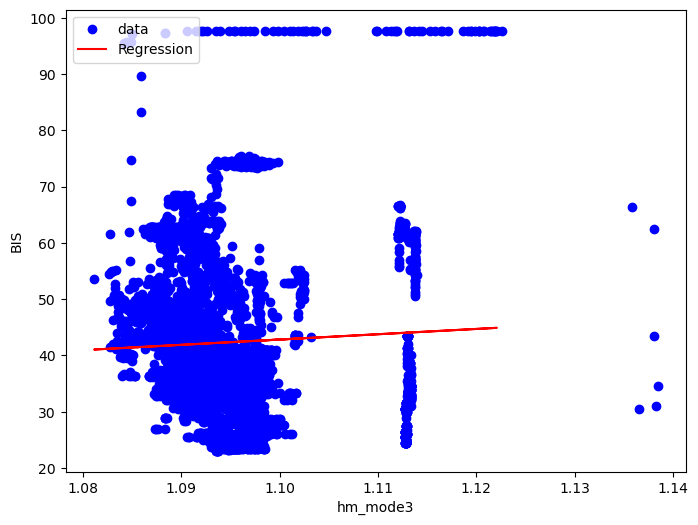

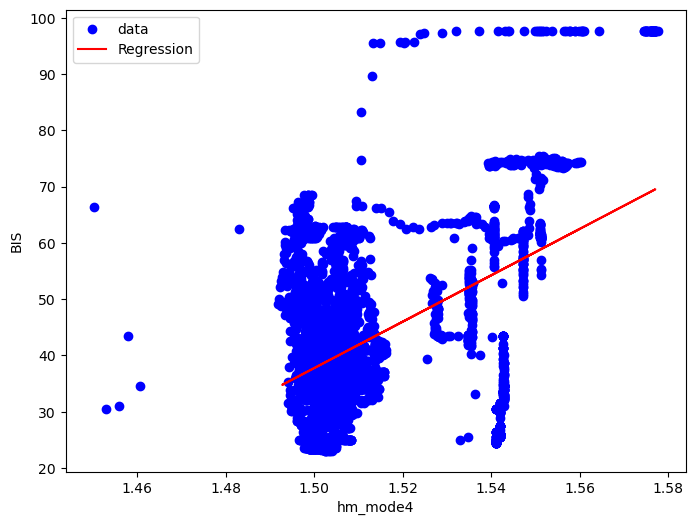

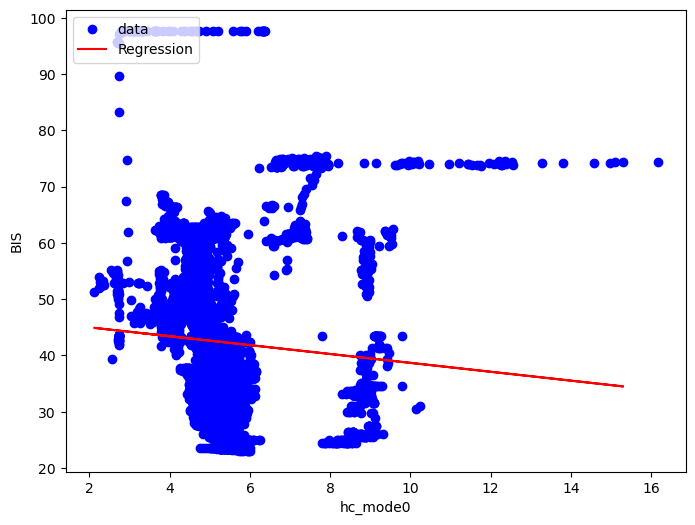

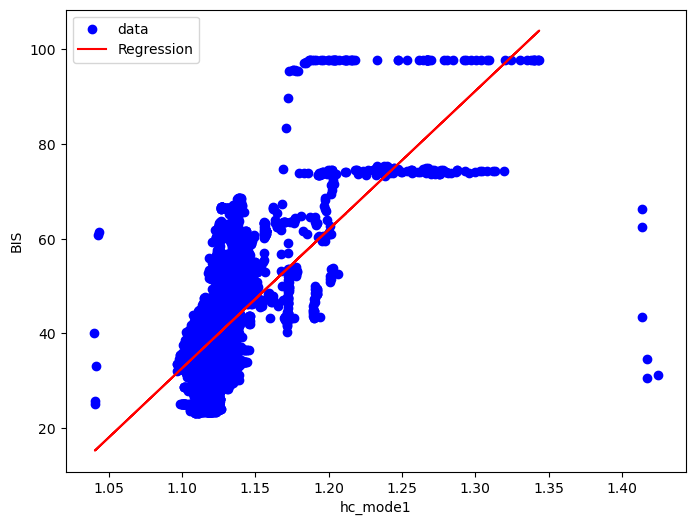

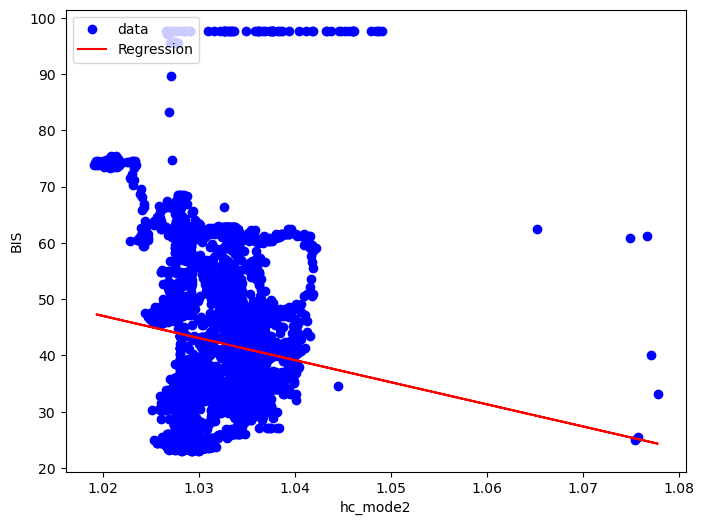

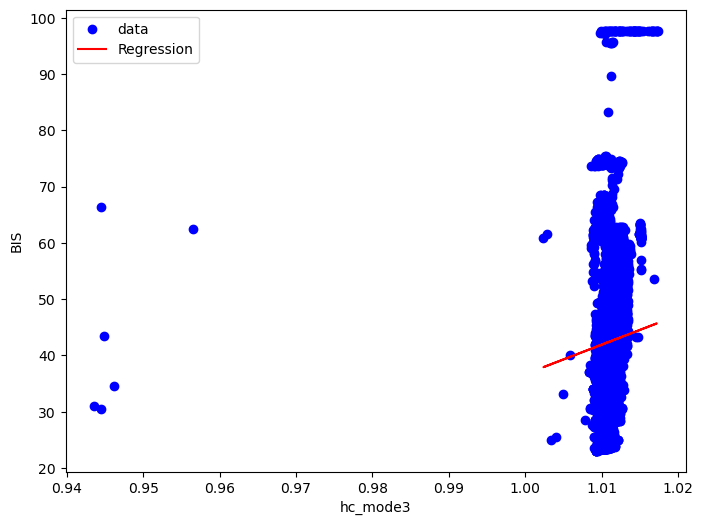

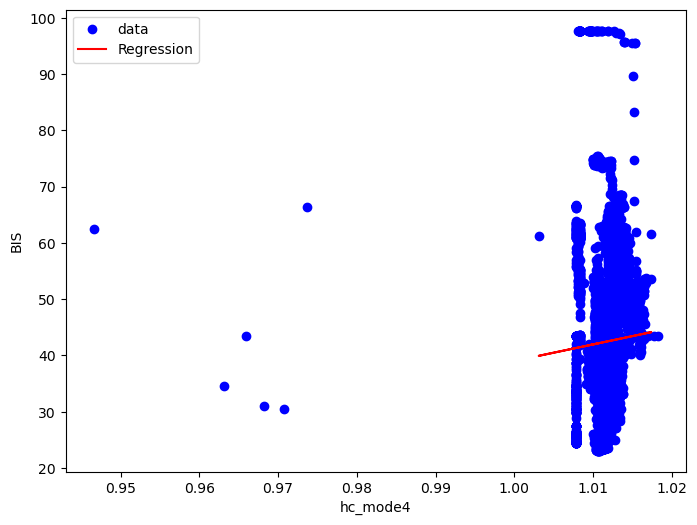

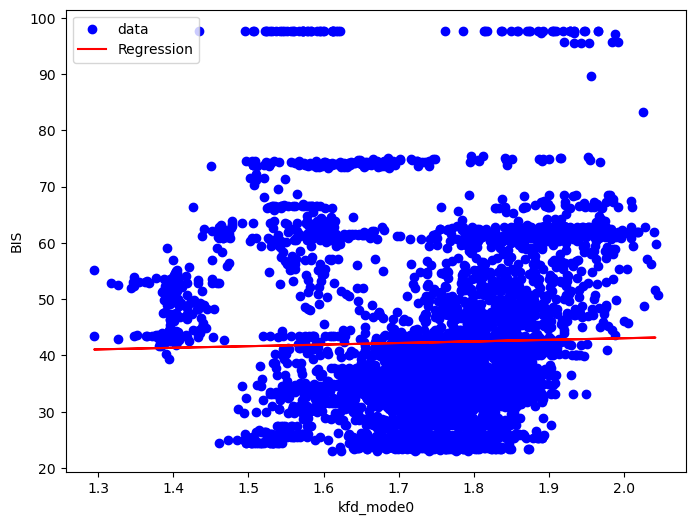

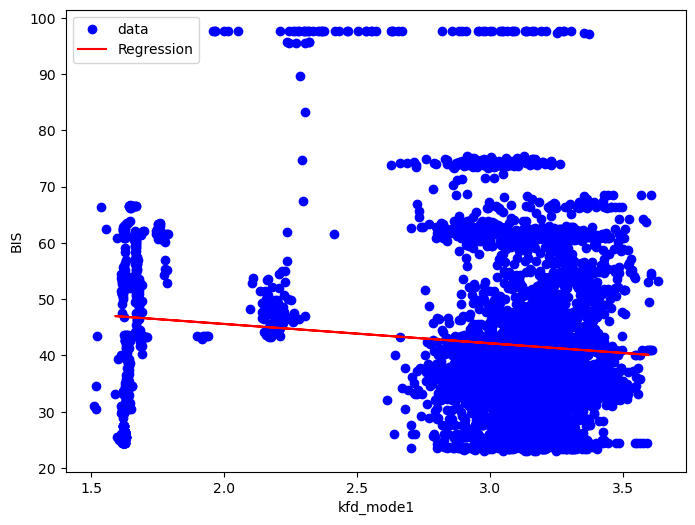

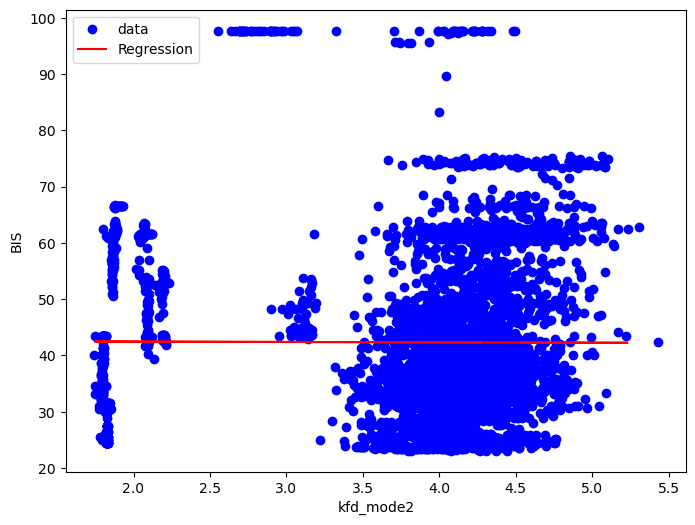

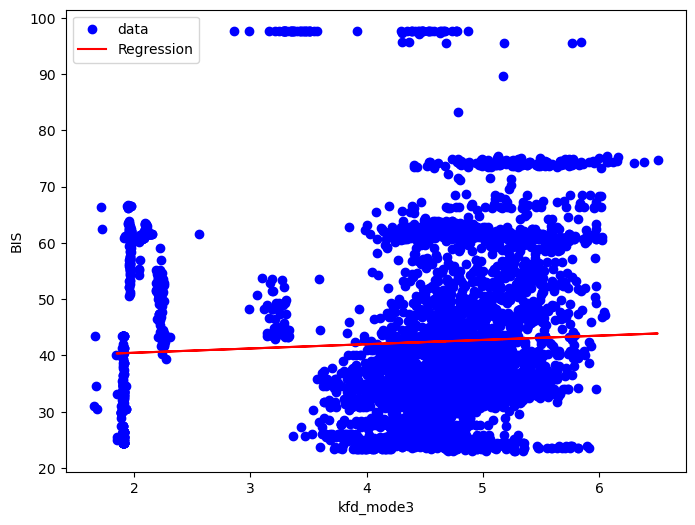

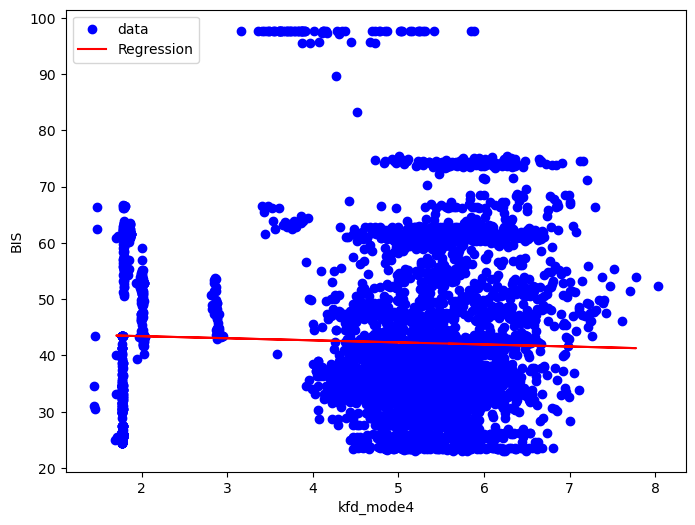

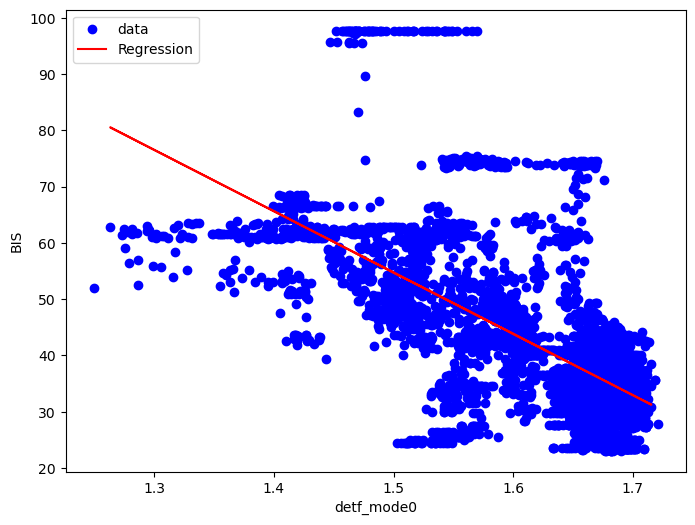

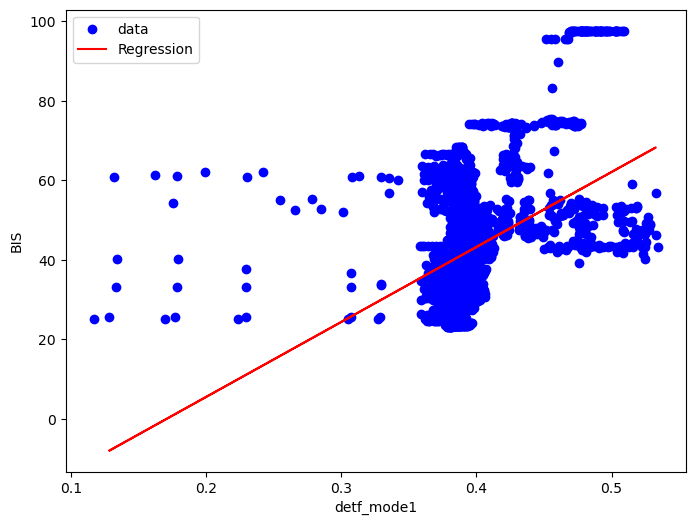

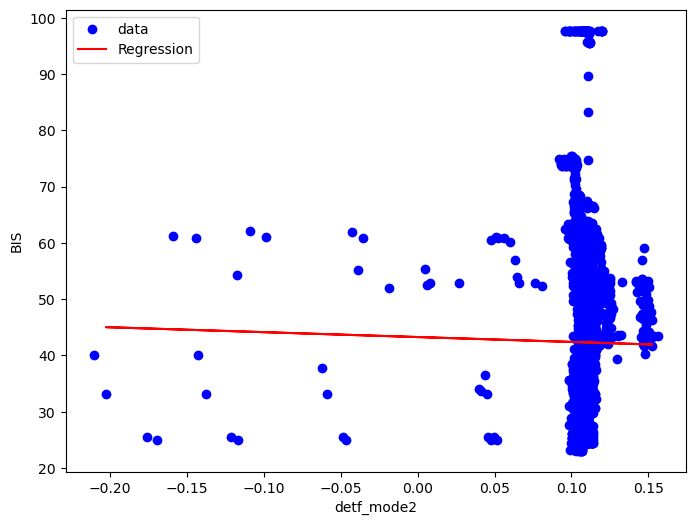

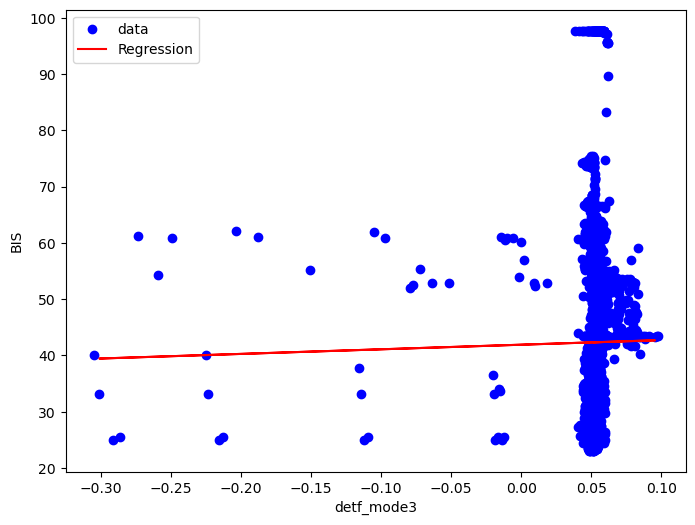

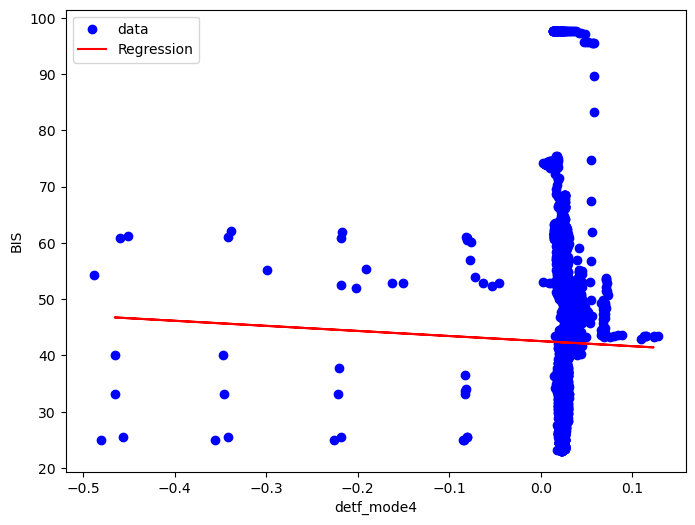

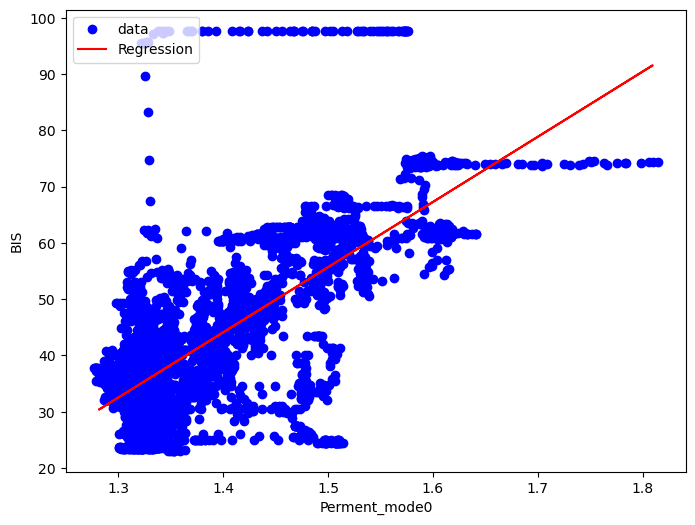

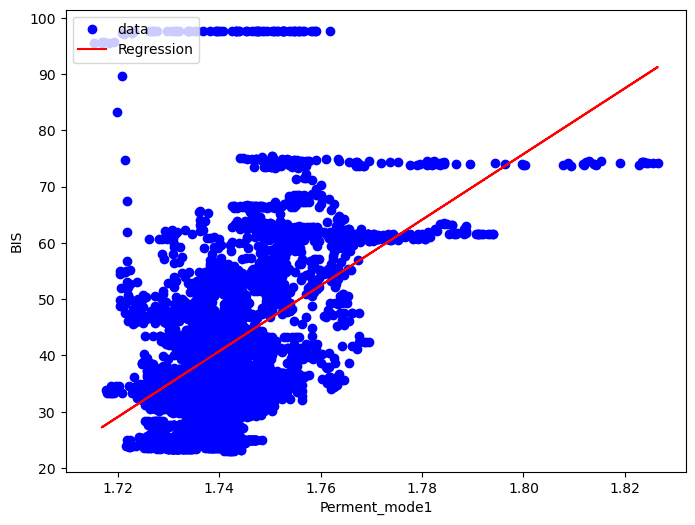

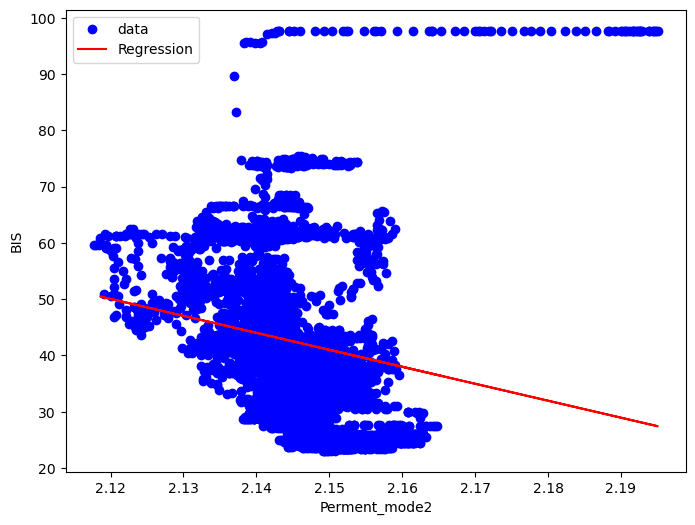

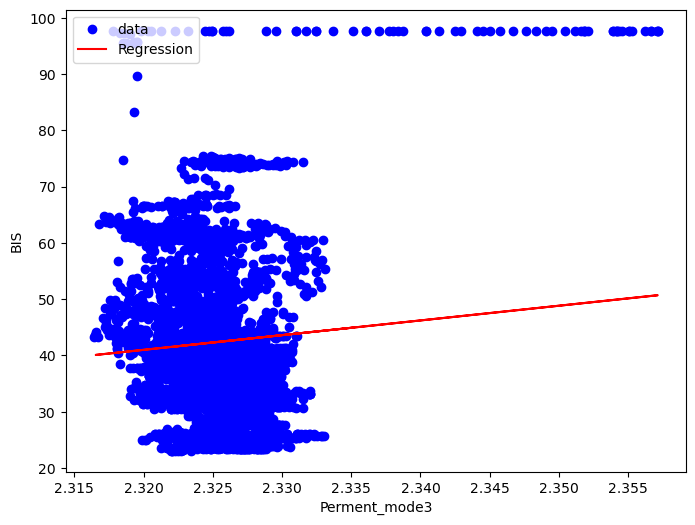

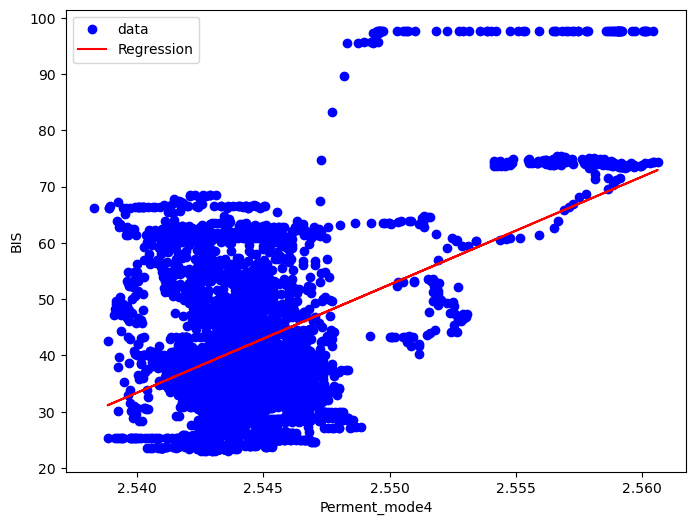

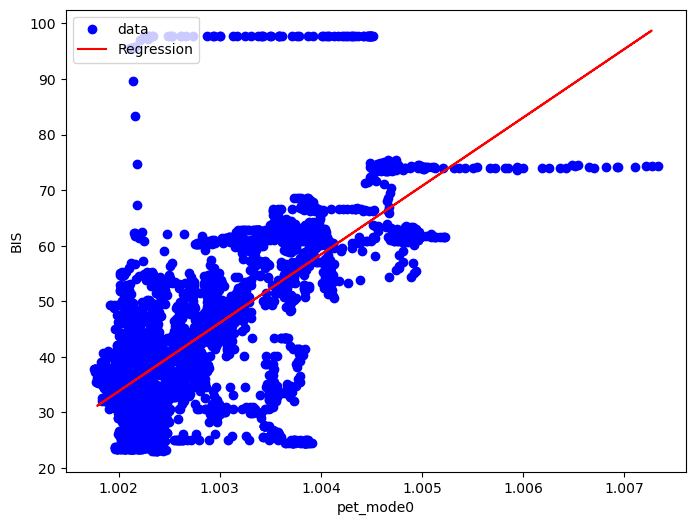

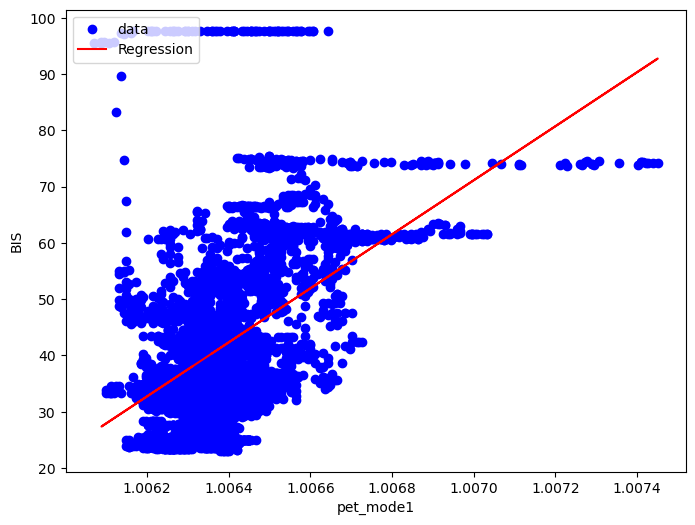

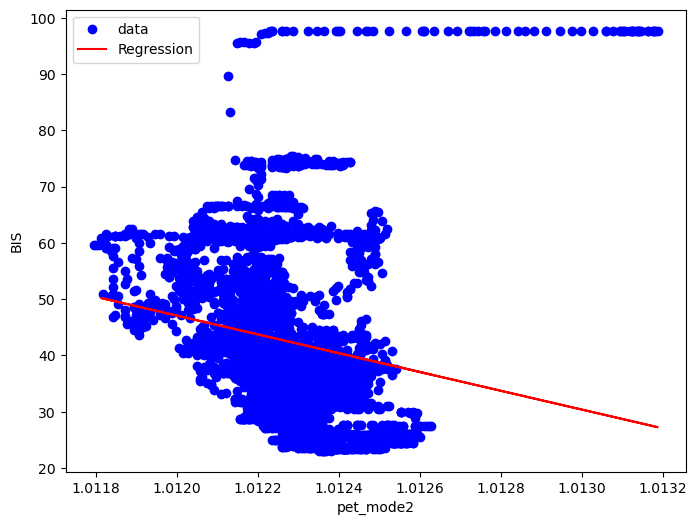

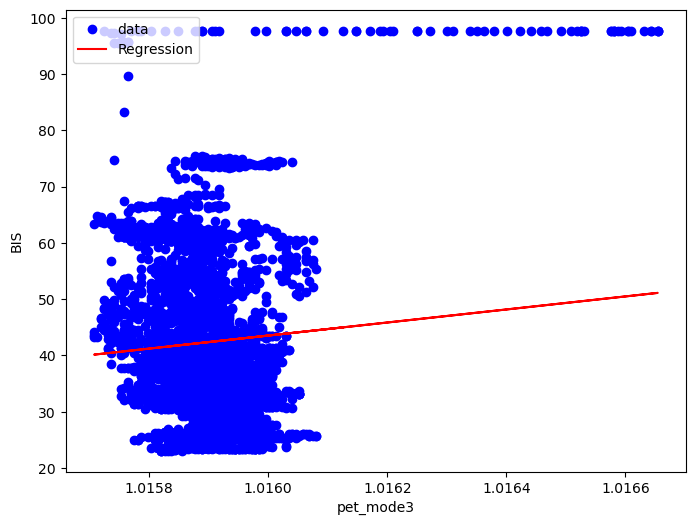

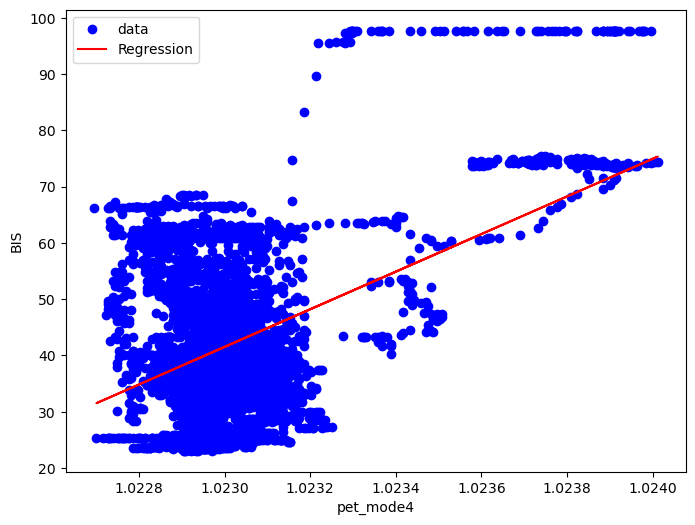

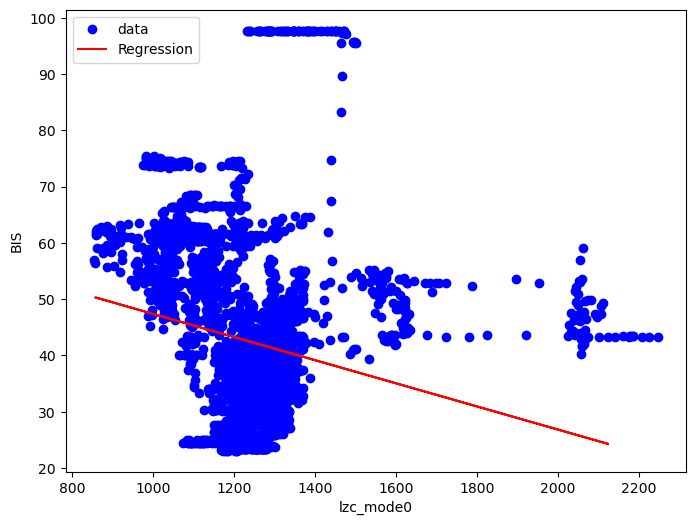

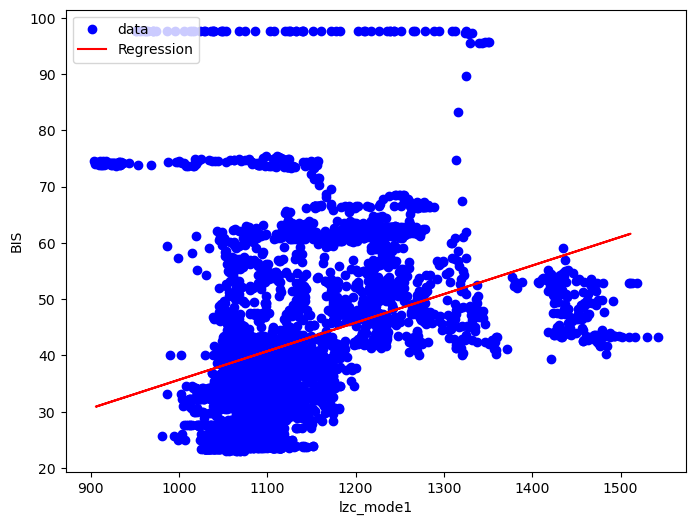

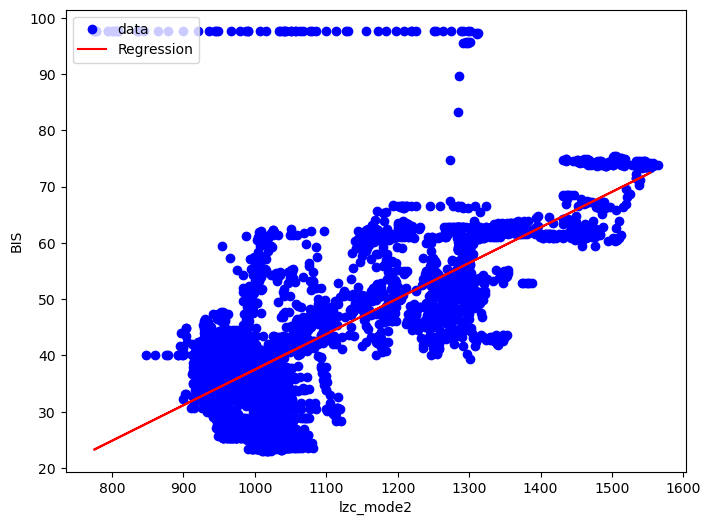

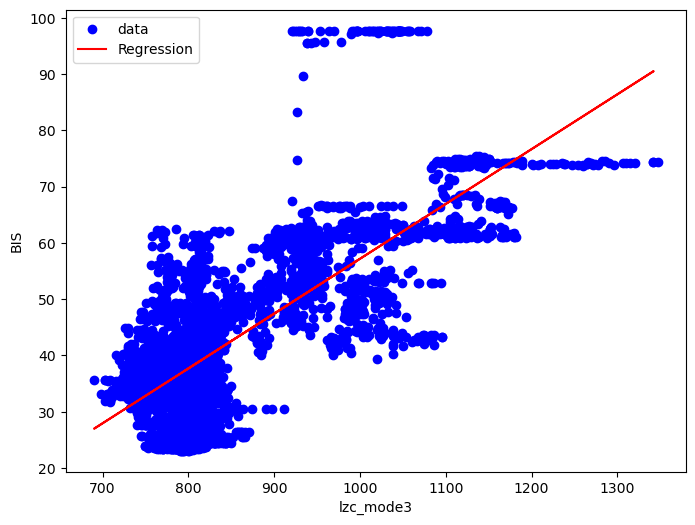

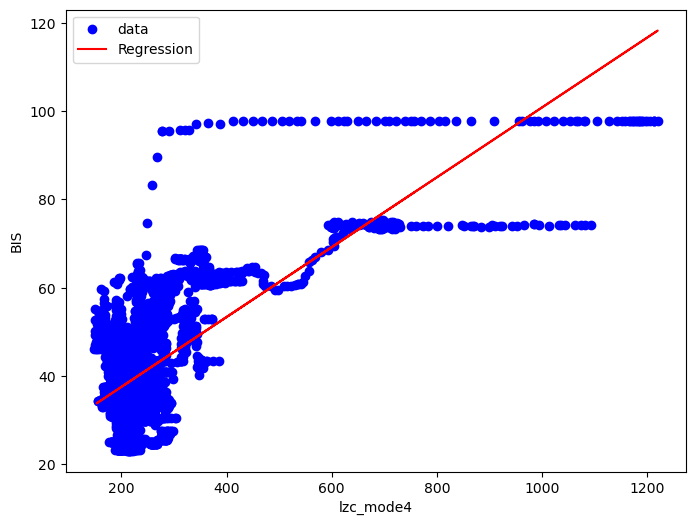

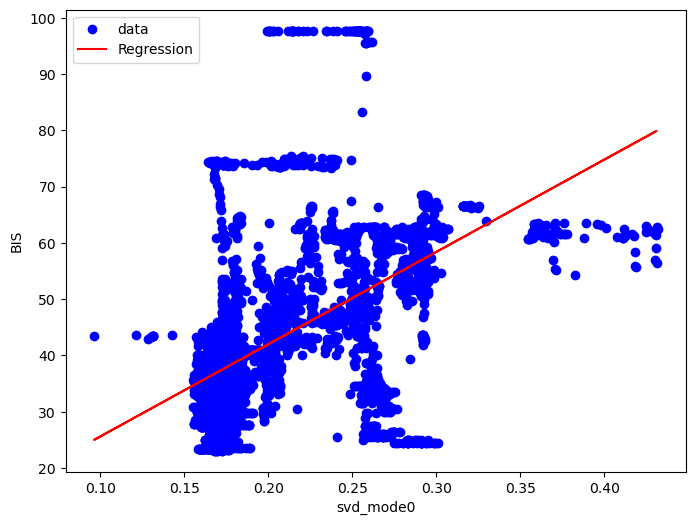

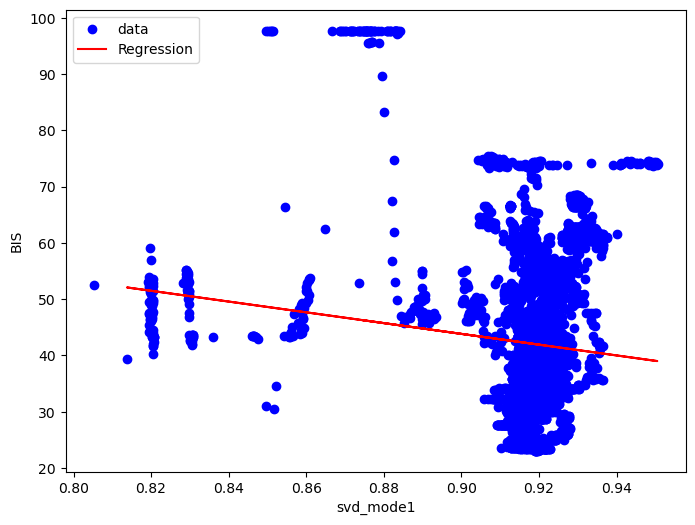

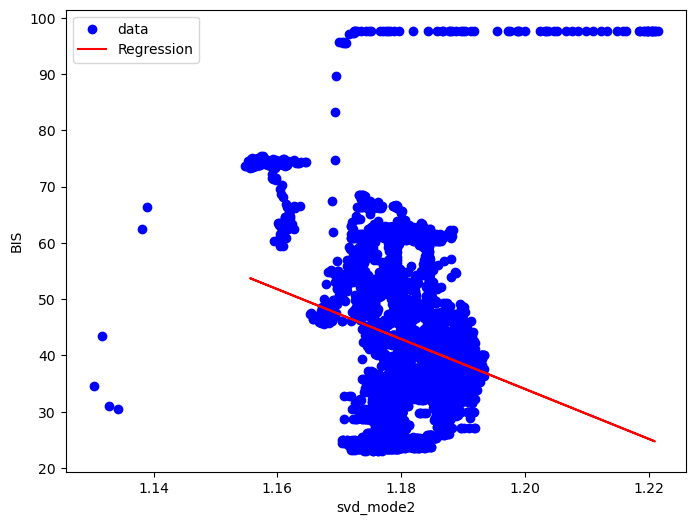

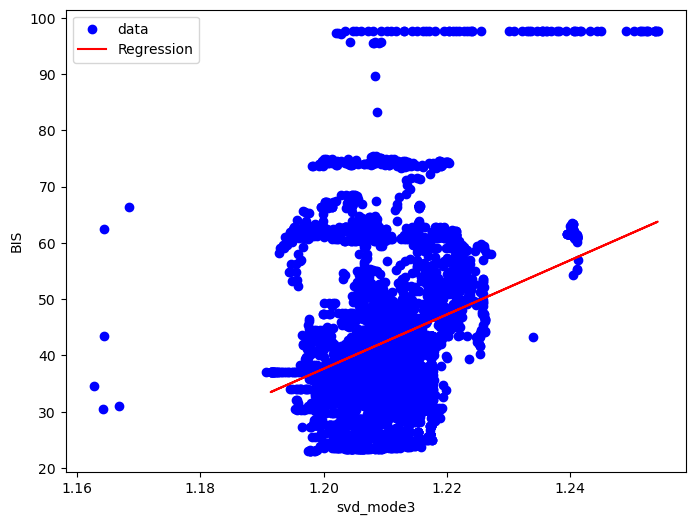

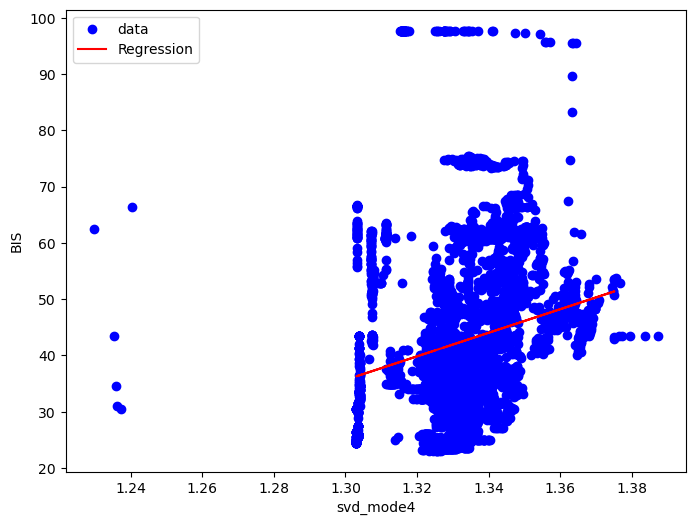

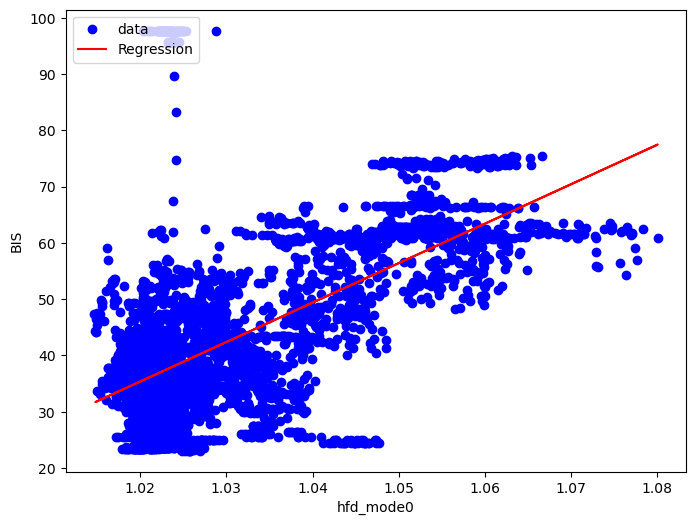

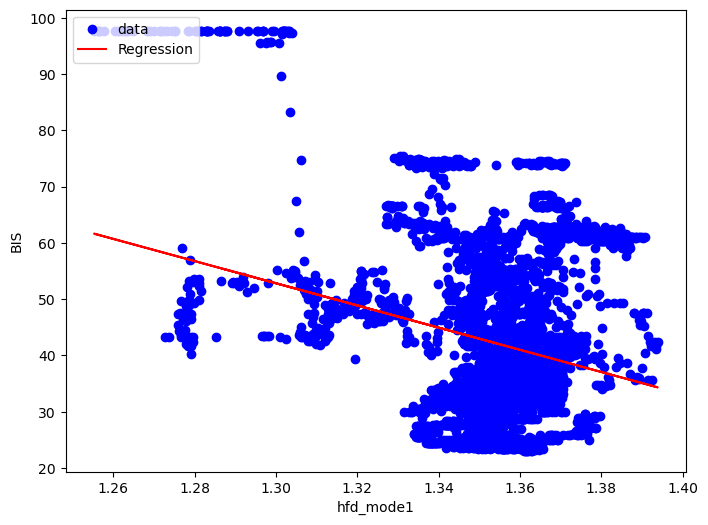

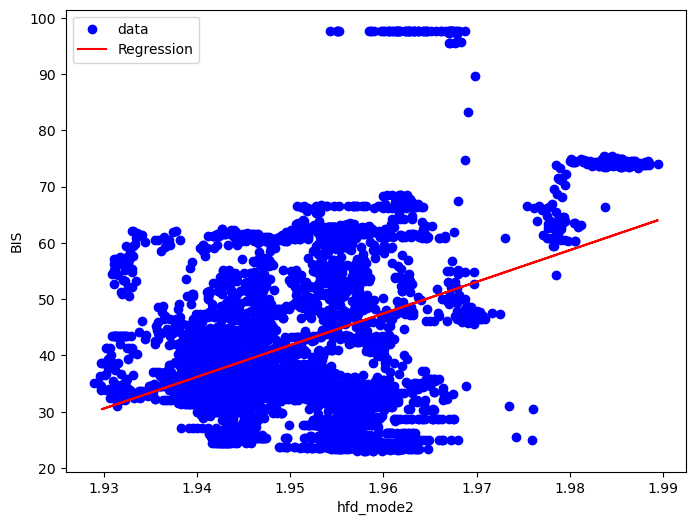

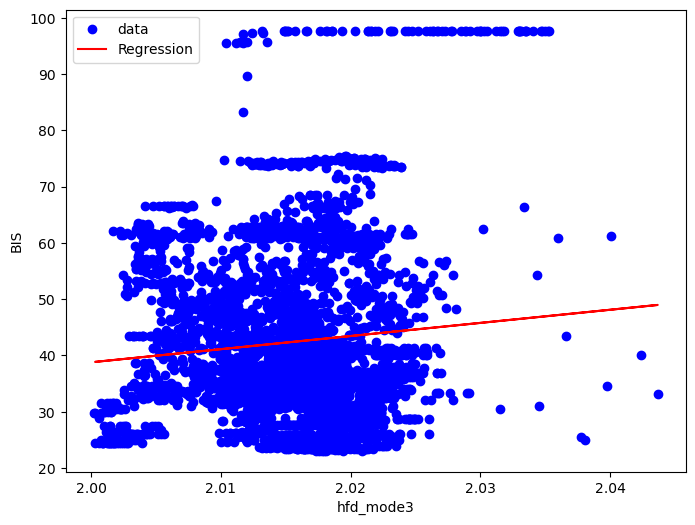

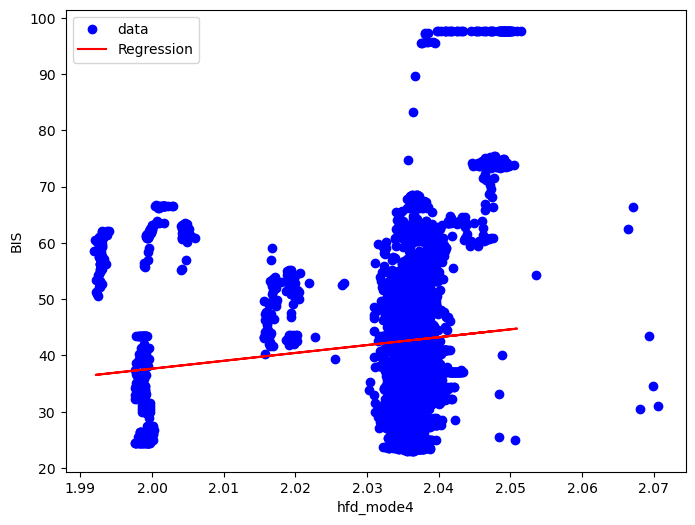

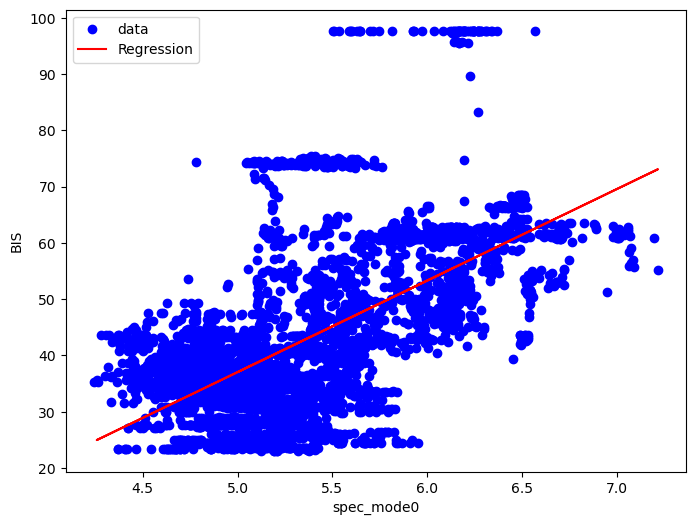

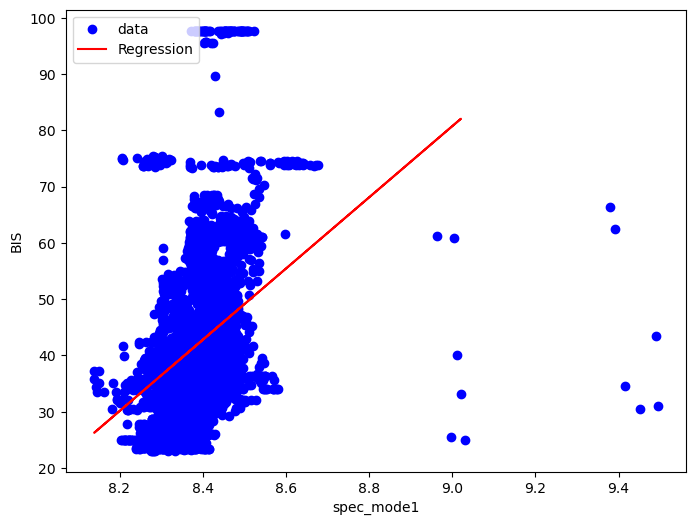

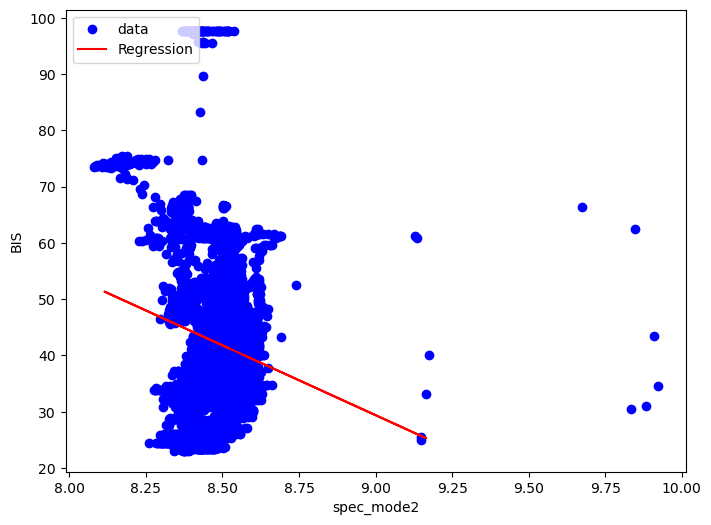

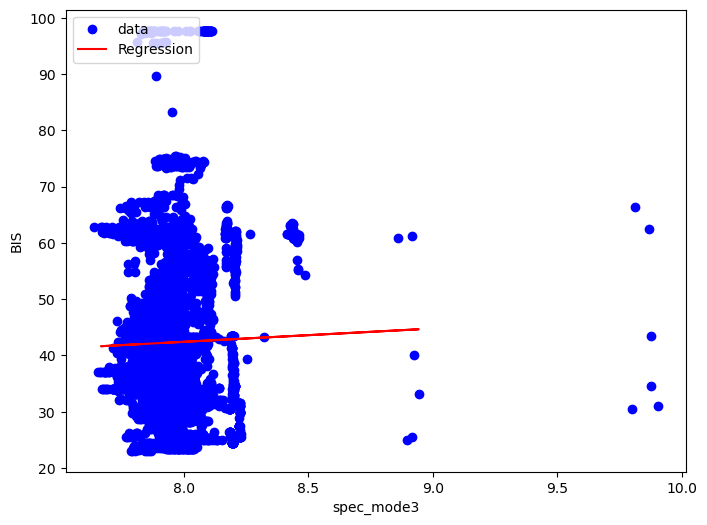

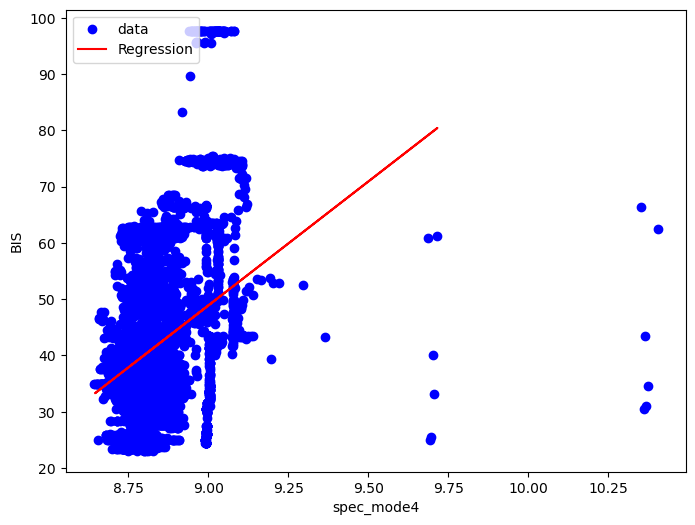

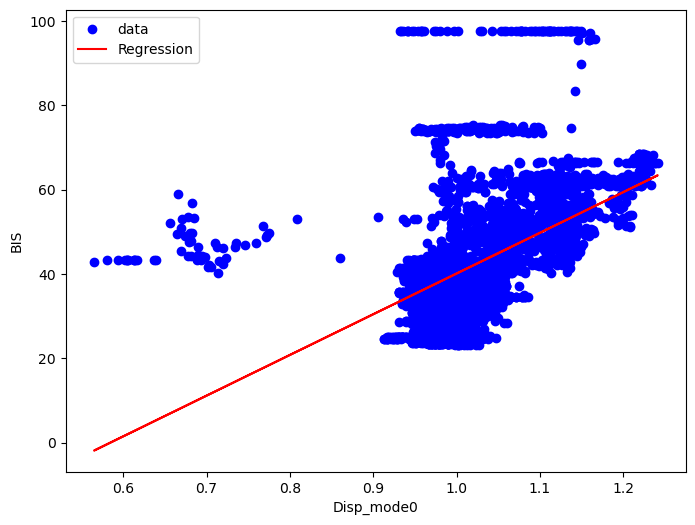

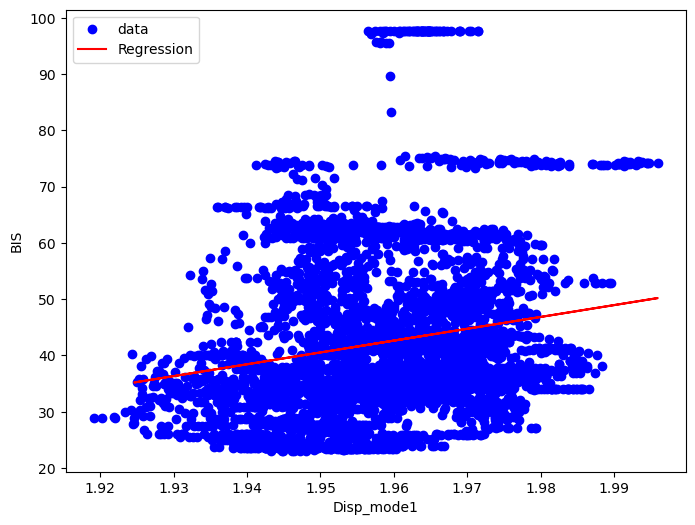

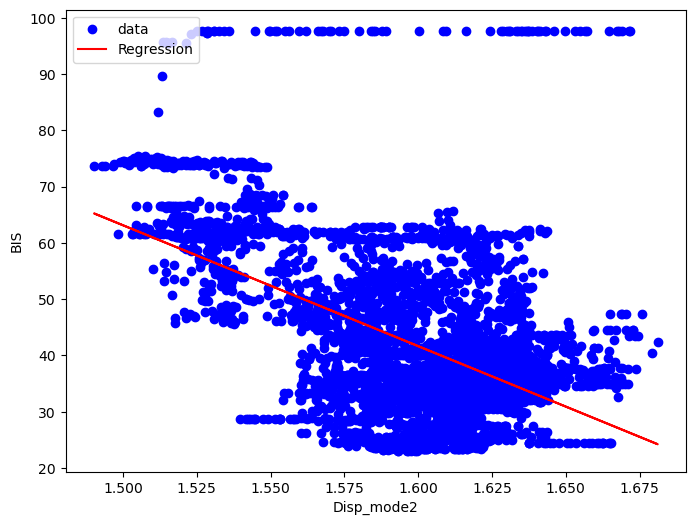

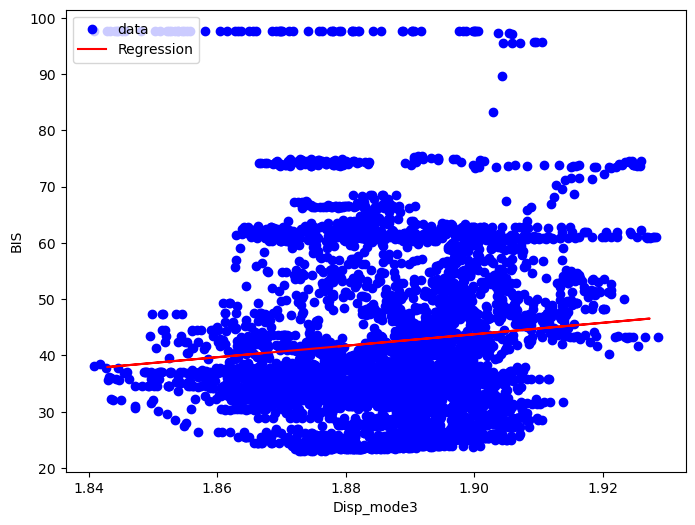

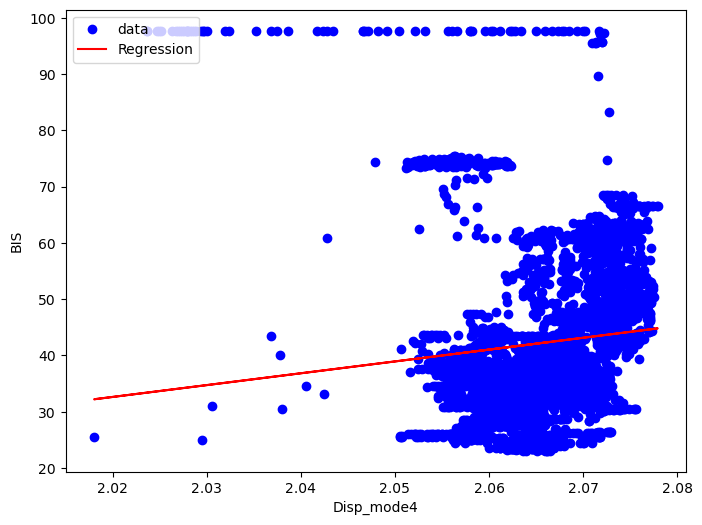

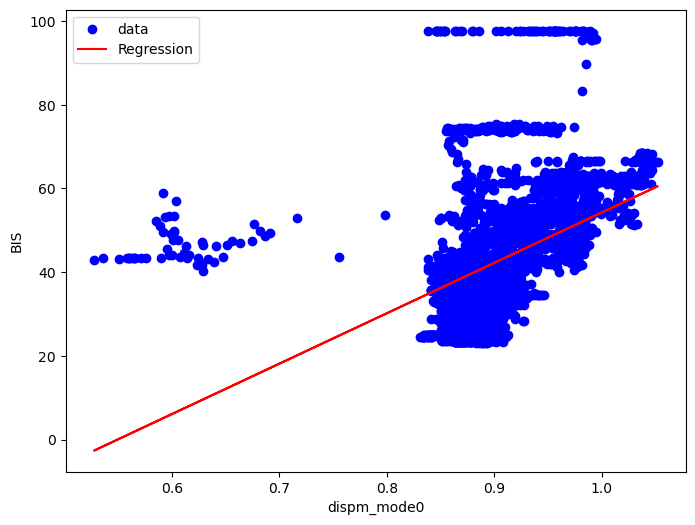

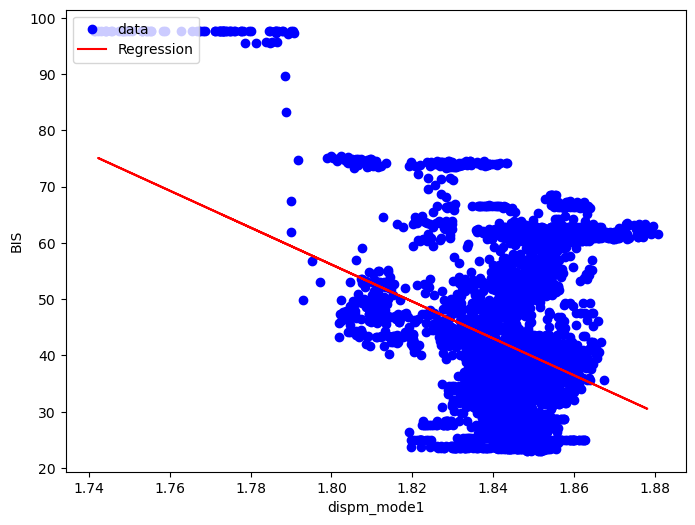

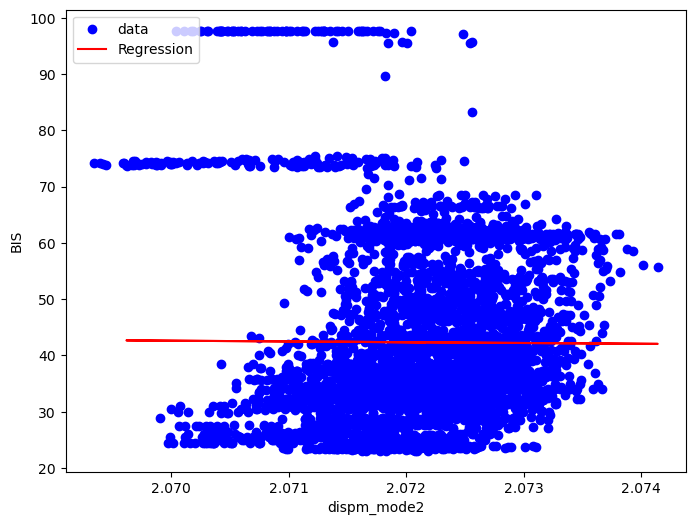

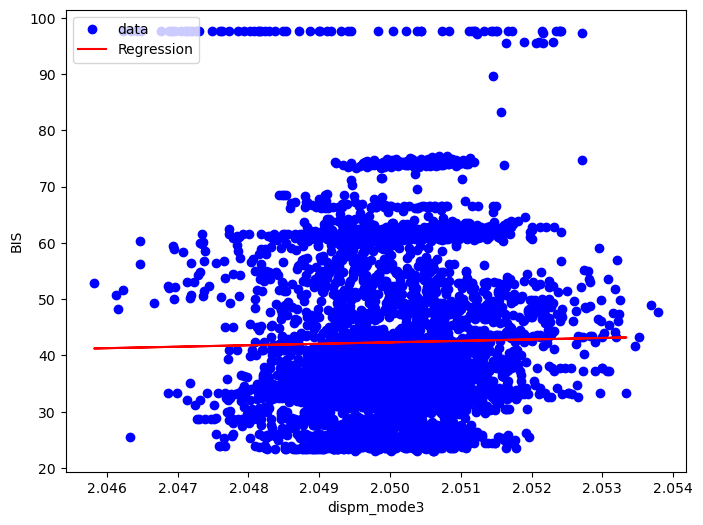

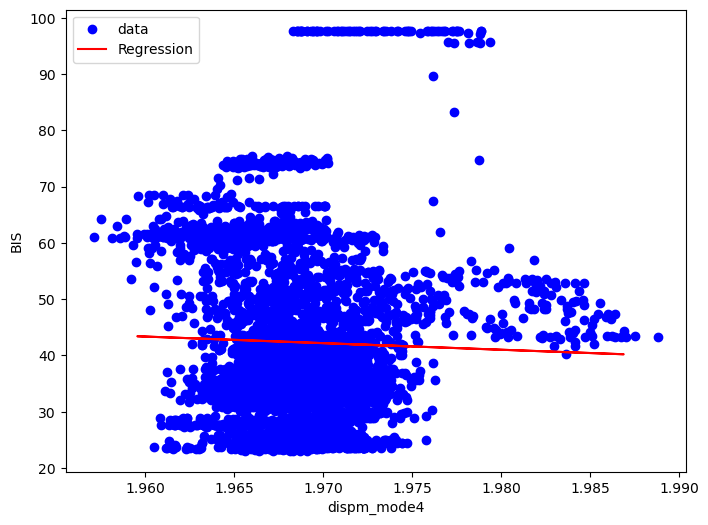

In [6]:

for column in patient_36.columns:
    if column == "BIS":
        continue
        
    plot_regression(patient_36, column)
    


In [7]:
# Metrics
total=pd.DataFrame({"Metrics": [key for key in metrics.keys()], "Values": [value*100 for value in metrics.values()]})

In [8]:
sort_total=total.sort_values('Values', ascending=False)
sort_total

,Metrics,Values
33,lzc_mode3_r2,58.336878
34,lzc_mode4_r2,50.994406
6,hc_mode1_r2,49.020407
20,Perment_mode0_r2,47.017282
25,pet_mode0_r2,46.466450
32,lzc_mode2_r2,41.879864
15,detf_mode0_r2,40.898267
40,hfd_mode0_r2,37.427450
45,spec_mode0_r2,35.480647
0,hm_mode0_r2,28.694976


### Radom forest feature selection

In [9]:


# Create a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature importances
feature_importances_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

# Display the feature importances
print(feature_importances_df)

# Select the top k features (e.g., top 10 features)
k = 10
selected_features = feature_importances_df.head(k)['feature'].tolist()

# Use only the selected features for further analysis or modeling
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


          feature  importance
33      lzc_mode3    0.599553
56    dispm_mode1    0.110547
25      pet_mode0    0.037989
34      lzc_mode4    0.029816
50     Disp_mode0    0.028236
37      svd_mode2    0.026444
22  Perment_mode2    0.014009
55    dispm_mode0    0.011157
7        hc_mode2    0.010479
15     detf_mode0    0.010099
4        hm_mode4    0.008914
21  Perment_mode1    0.007873
38      svd_mode3    0.006722
2        hm_mode2    0.006478
30      lzc_mode0    0.005771
31      lzc_mode1    0.005536
6        hc_mode1    0.005247
20  Perment_mode0    0.004666
26      pet_mode1    0.004372
52     Disp_mode2    0.004068
0        hm_mode0    0.003820
42      hfd_mode2    0.003306
17     detf_mode2    0.003235
1        hm_mode1    0.003119
32      lzc_mode2    0.002849
5        hc_mode0    0.002692
44      hfd_mode4    0.002566
54     Disp_mode4    0.002475
3        hm_mode3    0.002474
45     spec_mode0    0.002249
36      svd_mode1    0.002174
53     Disp_mode3    0.002141
24  Permen